In [39]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from scipy.special import softmax

import plotly.graph_objects as go

In [40]:
weight_cols = ["social imitation $\gamma$", "random jumps $\eta$", "noise $\\nu$", "privilege $\\rho$"]

In [49]:
def result_plot(data, ax=None, dpi = 100, alter_label=False, inter_start=75):
    """Create result plot for paper"""
    plt.rcdefaults()

    # 1. plt settings
    my_font = {"size": 6,
               "family": "sans-serif"
               }
    my_legend = {"fontsize": 7,
                 "loc": "upper right"
                 }
    my_axes = {"labelsize": 9,
               "linewidth": 0.5,
               }
    plt.rc('axes', **my_axes)
    plt.rc("legend", **my_legend)
    plt.rc("font", **my_font)

    # plt.rcParams.update({'font.sans-serif':'Helvetica'})
    if ax is None:
        plt.figure(figsize=(4, 2.6), dpi=dpi) # 4, 2.6
        ax = plt.gca()

    # 2. styles
    dash_styles = [
     ('loosely dotted', (0, (1, 4))),
     ('dotted', (0, (1, 1))),
     ('loosely dashdotted', (0, (3, 4, 1, 4))),
     ('dashdotted', (0, (3, 1, 1, 1))),]

    colors = ["royalblue", "gold", "darkorchid", "forestgreen"]

    # 3. Data
    for feature, (_, style), color in zip(data.columns, dash_styles, colors):
        ax.plot(data[feature], label=feature, linestyle=style, color=color)
    ax.axvline(x=inter_start, color="black", linestyle='dashed', label="Intervention")

    #4. Scalings
    ax.set_xlabel("Iteration t")
    ax.set_ylabel("Mean $W$ size")
    if alter_label:
        ax.set_ylabel("Normalized social influence weights")
    # plt.title("Influence of the intervention onto learning feature traits")
    ax.set_xlim([0,data.shape[0]])
    ax.set_facecolor("white")
    ax.legend(bbox_to_anchor=(1, 0.85))
    plt.grid(color='grey', alpha=0.4, linestyle='-', linewidth=0.2, visible=True, which="both")
    # plt.grid()
    plt.tight_layout()
    # plt.savefig("result_plot.png")
    return ax

In [45]:
data = np.load(f"intervention/Ackley/2024_01_08T14_52/Ackley_20_weights.npy")
data = data / data.sum(axis=1).reshape(-1,1)
df_weights = pd.DataFrame(data, columns=weight_cols)
df_weights["env"] = "Ack"

# envs = ["Ack", "MW", "DW"]
# env_names = ["Ackley", "MasonWatts", "DropWave"]
# df_omega = pd.concat((df_omega_Ack_Cont, df_omega_MW_Cont, df_omega_DW_Cont))

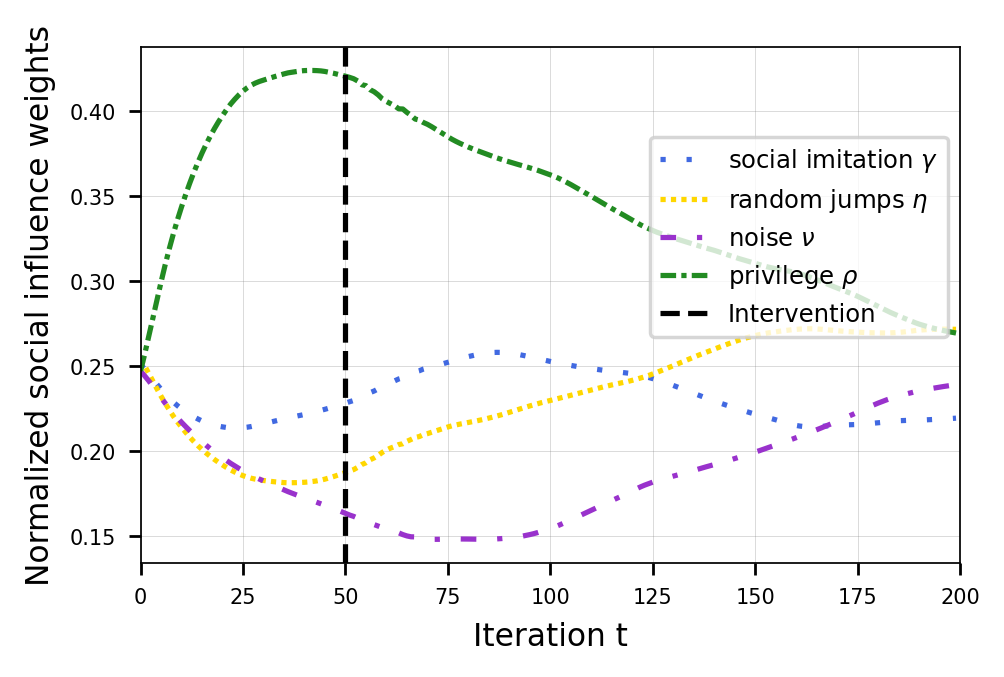

In [50]:
ax = result_plot(df_weights, dpi=250, alter_label=True, inter_start=50)
# plt.savefig("result_plot_Cont_scaled.png")
plt.show()